- Logistic Regression
- Decision Tree
- Random Forest

# Data Information

https://www.kaggle.com/c/titanic/data

- **Data Dictionary**

Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex	

Age	Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

- **Variable Notes**

**pclass**: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...

**Sibling** = brother, sister, stepbrother, stepsister

**Spouse** = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...

**Parent** = mother, father

**Child** = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Useful functions

In [2]:
# Create a function to apply the new age into the df
def insert_age(age_and_class, new_age, new_class):
    
    current_age = age_and_class[0]
    current_class = age_and_class[1]
    
    if pd.isnull(current_age):
        for i in range(len(new_class)):
            if (new_class[i] == current_class):
                return(new_age[i])
    else:
        return(current_age)  
    
# Check if function is working
#df = pd.DataFrame([[np.nan,3],[30,2]], columns = ['Age','Pclass'])
#df.apply(insert_age,args = [new_age, new_class], axis = 1)

#-------------------------------------------------------------------------------
# Print metrics
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

def print_metrics(name, y_test, y_pred):
    print('--> ',name, '\n')
    print('Accuracy Score: %.4f'%accuracy_score(y_test,y_pred))
    print('\n Confusion Matix: \n', confusion_matrix(y_test, y_pred))
    print('\n \n Classification Report: ', classification_report(y_test, y_pred))
    return()



#-------------------------------------------------------------------------------

# Load the data

In [3]:
test = pd.read_csv('test.csv')
test_original = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

# Check the data

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Visualization

In [7]:
sns.set_style('whitegrid')

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

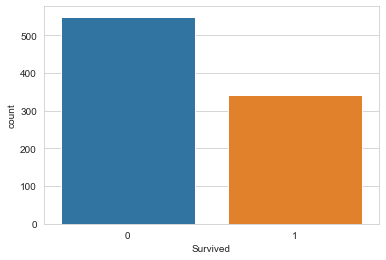

In [8]:
# How many survived (0 = No, 1 = Yes)

print(train['Survived'].value_counts())

sns.countplot(x='Survived', data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

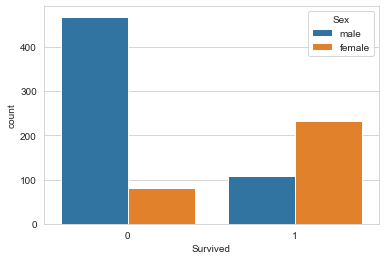

In [9]:
# How many survived by Sex
sns.countplot(x = 'Survived', data = train, hue = 'Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

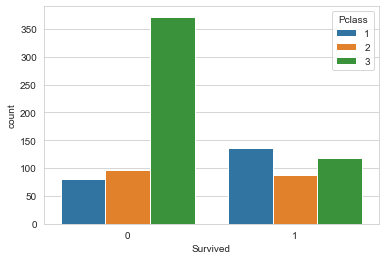

In [10]:
# How many survived by Pclass
sns.countplot(x = 'Survived', data = train, hue = 'Pclass')

<AxesSubplot:xlabel='Age', ylabel='Count'>

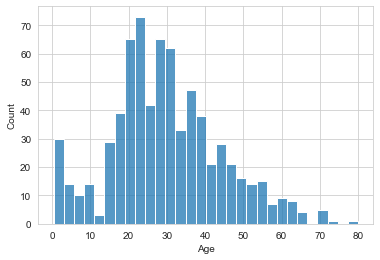

In [11]:
# Age distribution
sns.histplot(data = train, x = 'Age', bins = 30)

<AxesSubplot:xlabel='Age', ylabel='Count'>

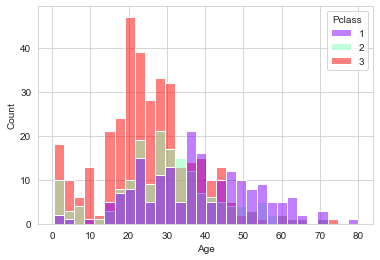

In [12]:
# Age distribution by Pclass
sns.histplot(data = train, x = 'Age', bins = 30, hue = 'Pclass', palette='rainbow', alpha = 0.5)

<AxesSubplot:xlabel='Age', ylabel='Count'>

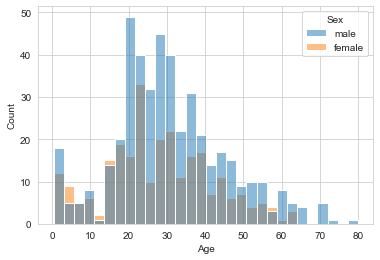

In [13]:
# Age distribution by Sex
sns.histplot(data = train, x = 'Age', bins = 30, hue = 'Sex', alpha = 0.5)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

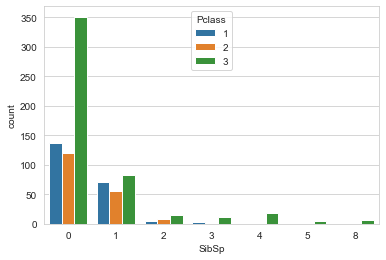

In [14]:
# Number of siblings by Pclass
sns.countplot(data = train, x = 'SibSp', hue = 'Pclass')

<AxesSubplot:xlabel='Age', ylabel='Count'>

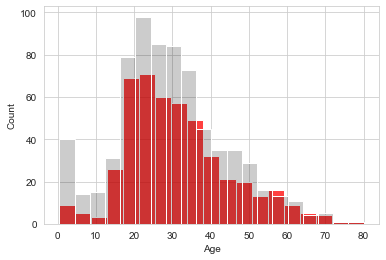

In [15]:
# Age distribution of people traveling alone (red) vrs age distribution of the train population (faint black)
age_SibSp_0 = train[train['SibSp']==0]['Age']
sns.histplot(data = age_SibSp_0, color = 'Red')
sns.histplot(data = train['Age'], color = 'black', alpha = 0.2)

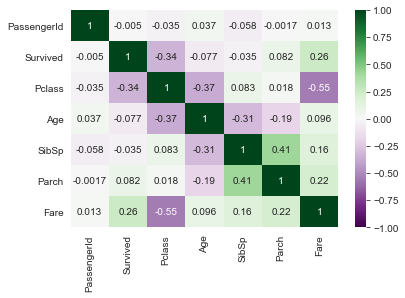

In [16]:
# Correlation matrix
corr_mat = train.corr()
sns.heatmap(corr_mat, annot=True, cmap='PRGn', vmin=-1, vmax=1)
plt.show()

<AxesSubplot:xlabel='Fare', ylabel='Count'>

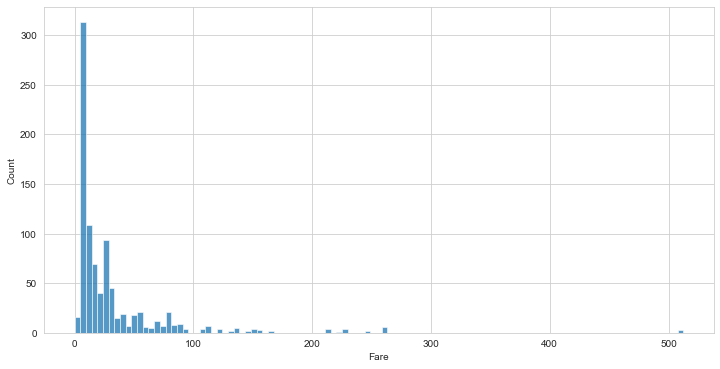

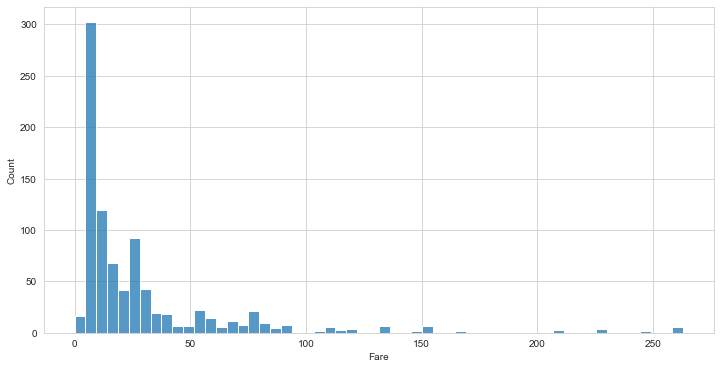

In [17]:
# Fare distribution
plt.figure(figsize=(12,6))
sns.histplot(data = train, x = 'Fare')

plt.figure(figsize=(12,6))
sns.histplot(data= train[train['Fare']<300], x = 'Fare')

# Preparing the TRAIN set

In [18]:
# Is there missing data in the dataframe
train.isnull().values.any()

True

In [19]:
lines_train = len(train.iloc[:,0])

print('Feature: Number of missing values, Fraction of missing values')
for col in train:
    print('%s: %d, %.3f'%(col, sum(train[col].isnull()), sum(train[col].isnull())/lines_train))

Feature: Number of missing values, Fraction of missing values
PassengerId: 0, 0.000
Survived: 0, 0.000
Pclass: 0, 0.000
Name: 0, 0.000
Sex: 0, 0.000
Age: 177, 0.199
SibSp: 0, 0.000
Parch: 0, 0.000
Ticket: 0, 0.000
Fare: 0, 0.000
Cabin: 687, 0.771
Embarked: 2, 0.002


<AxesSubplot:>

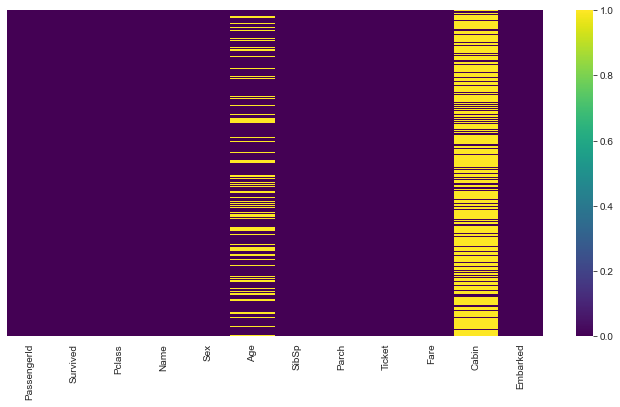

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels = False,  cmap = 'viridis')

In [21]:
# Annotate columns with missing values

column = train.columns
col_with_NaN = []

for col in column:
    if(train[col].isnull().any()):
        col_with_NaN.append(col)
        
print(col_with_NaN)     

['Age', 'Cabin', 'Embarked']


**Age** (20% of missing values): missing values will be filled with mean age value based on the Pclass

**Cabin** (77% of missing values): column will be dropped

**Embarked** (0.002% of missing values): lines with missing values will be filled with the most popular embarked location

## Filling Age's missing values

Age is correlated with Pclass, $\rho = -0.37$. So I will take that into consideration to calculate the mean to be inserted in the dataframe.

<AxesSubplot:xlabel='Age', ylabel='Count'>

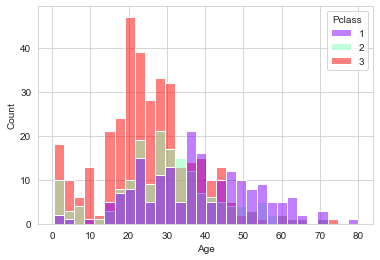

In [22]:
sns.histplot(data = train, x = 'Age', bins = 30, hue = 'Pclass', palette='rainbow', alpha = 0.5)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

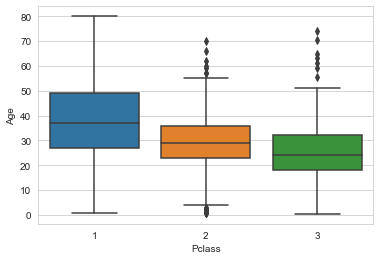

In [23]:
sns.boxplot(data = train, x = 'Pclass', y = 'Age')

In [24]:
# Calculating the mean age per class
new_age = []
new_class = []

for pclass in train['Pclass'].unique():
    new_age.append(np.nanmean(train[train['Pclass'] == pclass]['Age']))
    new_class.append(pclass)


print(new_age)    
print(new_class)

[25.14061971830986, 38.233440860215055, 29.87763005780347]
[3, 1, 2]


In [25]:
# Apply this function
train['Age'] = train[['Age','Pclass']].apply(insert_age,args = [new_age, new_class], axis = 1)

In [26]:
# Check if all missing values were replaced
train['Age'].isnull().any()

False

## Dropping Cabin column

In [27]:
train.drop('Cabin', axis = 1, inplace = True)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Filling Embarked's missing values

In [29]:
# Count emabarked values
train['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [30]:
# Select the most popular embarked location
most_embarked = train['Embarked'].value_counts(dropna = False).index.values[0]

In [31]:
# Replace the missing values
train.loc[train['Embarked'].isnull(),'Embarked'] = most_embarked

In [32]:
# Check if it worked
train['Embarked'].value_counts(dropna=False)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

## Make sure there's no more missing data

In [33]:
train.isnull().sum().sum()

0

## Dealing with categorical data: OneHotEncoder

Categorical: Sex, Embarked. 'Name' will not be used

In [34]:
# Transform categorical data into numerical one with OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [35]:
encoder_train = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(),['Sex','Embarked'])], remainder='passthrough', verbose_feature_names_out = False)

In [36]:
# returns a numpy array
train_encoder = encoder_train.fit_transform(train)

# back to a dataframe
train_encoder = pd.DataFrame(train_encoder, columns = encoder_train.get_feature_names_out())


In [37]:
train_encoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sex_female   891 non-null    object
 1   Sex_male     891 non-null    object
 2   Embarked_C   891 non-null    object
 3   Embarked_Q   891 non-null    object
 4   Embarked_S   891 non-null    object
 5   PassengerId  891 non-null    object
 6   Survived     891 non-null    object
 7   Pclass       891 non-null    object
 8   Name         891 non-null    object
 9   Age          891 non-null    object
 10  SibSp        891 non-null    object
 11  Parch        891 non-null    object
 12  Ticket       891 non-null    object
 13  Fare         891 non-null    object
dtypes: object(14)
memory usage: 97.6+ KB


## Dropping columns that will not be used to fit the model

Columns that will not be used: PassngerId, Name, Ticket

In [41]:
train_drop = train_encoder.drop(['PassengerId','Name', 'Ticket'], axis = 1)

In [42]:
train_drop.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,0.0,1.0,0,3,22.0,1,0,7.25
1,1.0,0.0,1.0,0.0,0.0,1,1,38.0,1,0,71.2833
2,1.0,0.0,0.0,0.0,1.0,1,3,26.0,0,0,7.925
3,1.0,0.0,0.0,0.0,1.0,1,1,35.0,1,0,53.1
4,0.0,1.0,0.0,0.0,1.0,0,3,35.0,0,0,8.05


## Separating the target column

In [46]:
train_x = train_drop.drop('Survived', axis = 1)
train_y = train_drop['Survived']

In [47]:
train_x.head(2)

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,0.0,1.0,3,22.0,1,0,7.25
1,1.0,0.0,1.0,0.0,0.0,1,38.0,1,0,71.2833


In [48]:
train_y.head(2)

0    0
1    1
Name: Survived, dtype: object

## NEW: Standard Scaler

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler_train = StandardScaler()

In [54]:
scaler_train.fit(train_x)
train_x_scaler = scaler_train.transform(train_x) #returns numpy array
train_x_scaler = pd.DataFrame(train_scaler, columns = train_x.columns)

In [56]:
train_x_scaler.head(2)

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,Age,SibSp,Parch,Fare
0,-0.737695,0.737695,-0.482043,-0.307562,0.615838,0.827377,-0.552360,0.432793,-0.473674,-0.502445
1,1.355574,-1.355574,2.074505,-0.307562,-1.623803,-1.566107,0.659475,0.432793,-0.473674,0.786845


# Preparing the TEST set

## Filling missing values

Can't remove those lines, have to replace them with some value

In [41]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [42]:
# -> Age: Same thing I did before for the train set

# Calculating the mean age per class
new_age = []
new_class = []

for pclass in test['Pclass'].unique():
    new_age.append(np.nanmean(test[test['Pclass'] == pclass]['Age']))
    new_class.append(pclass)

test['Age'] = test[['Age','Pclass']].apply(insert_age,args = [new_age, new_class], axis = 1)

In [43]:
# -> Fare: replace with median value
median_fare = np.nanmedian(test['Fare'])
test.loc[test['Fare'].isnull(),'Fare'] = median_fare


In [44]:
# drop column 'Cabin' that is full of missing values
test.drop('Cabin', axis = 1, inplace = True)

In [45]:
# Check again for null data
test.isnull().any().sum()

0

## Dealing with categorical data: OneHotEncoder. Drop useless columns

In [46]:
# encoder for categorical values
encoder_test = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(),['Sex','Embarked'])], remainder='passthrough', verbose_feature_names_out = False)
test_encoder = encoder_test.fit_transform(test)
test_encoder = pd.DataFrame(test_encoder, columns = encoder_test.get_feature_names_out())

In [47]:
# drop useless columns
test = test_encoder.drop(['PassengerId','Name', 'Ticket'], axis = 1)

# Train Test Split on the TRAIN set

## Stratified Shuffle Split

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit

In [49]:
# making a split by preserving the percentage of samples for each class

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3) 
for train_index, test_index in split.split(train_final, train_final["Survived"]):
    strat_train_set = train_final.loc[train_index]
    strat_test_set = train_final.loc[test_index]

In [50]:
# checking the split ratio between original and new set
print(strat_test_set['Survived'].value_counts()/len(strat_test_set))
print(train_final['Survived'].value_counts()/len(train_final))

0    0.615672
1    0.384328
Name: Survived, dtype: float64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


In [51]:
strat_train_set.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,Age,SibSp,Parch,Fare
836,0.0,1.0,0.0,0.0,1.0,0,3,21.0,0,0,8.6625
214,0.0,1.0,0.0,1.0,0.0,0,3,25.14062,1,0,7.75
20,0.0,1.0,0.0,0.0,1.0,0,2,35.0,0,0,26.0
682,0.0,1.0,0.0,0.0,1.0,0,3,20.0,0,0,9.225
485,1.0,0.0,0.0,0.0,1.0,0,3,25.14062,3,1,25.4667


In [52]:
strat_test_set.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,Age,SibSp,Parch,Fare
178,0.0,1.0,0.0,0.0,1.0,0,2,30.0,0,0,13.0
559,1.0,0.0,0.0,0.0,1.0,1,3,36.0,1,0,17.4
636,0.0,1.0,0.0,0.0,1.0,0,3,32.0,0,0,7.925
763,1.0,0.0,0.0,0.0,1.0,1,1,36.0,1,2,120.0
745,0.0,1.0,0.0,0.0,1.0,0,1,70.0,1,1,71.0


## Defining train and test variables

In [53]:
x_train = strat_train_set.drop('Survived', axis = 1)
x_test = strat_test_set.drop('Survived', axis = 1)
y_train = strat_train_set['Survived'].astype(int)
y_test = strat_test_set['Survived'].astype(int)

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr_model = LogisticRegression(max_iter = 400)
lr_model.fit(x_train,y_train)

LogisticRegression(max_iter=400)

In [56]:
lr_y_pred = lr_model.predict(x_test)

## Calculate metrics

In [81]:
print_metrics('Logistic Regression', y_test,lr_y_pred)

-->  Logistic Regression 

Accuracy Score: 0.8209

 Confusion Matix: 
 [[149  16]
 [ 32  71]]

 
 Classification Report:                precision    recall  f1-score   support

           0       0.82      0.90      0.86       165
           1       0.82      0.69      0.75       103

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



()

# Decision Tree

In [67]:
from  sklearn.tree import DecisionTreeClassifier

In [68]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
dtree_y_pred = dtree.predict(x_test)

In [82]:
print_metrics('Decision Tree', y_test, dtree_y_pred)

-->  Decision Tree 

Accuracy Score: 0.7724

 Confusion Matix: 
 [[130  35]
 [ 26  77]]

 
 Classification Report:                precision    recall  f1-score   support

           0       0.83      0.79      0.81       165
           1       0.69      0.75      0.72       103

    accuracy                           0.77       268
   macro avg       0.76      0.77      0.76       268
weighted avg       0.78      0.77      0.77       268



()

# Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rand_f = RandomForestClassifier(n_estimators=200)
rand_f.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [85]:
rand_f_y_pred = rand_f.predict(x_test)

In [87]:
print_metrics('Random Forest', y_test,rand_f_y_pred)

-->  Random Forest 

Accuracy Score: 0.8358

 Confusion Matix: 
 [[145  20]
 [ 24  79]]

 
 Classification Report:                precision    recall  f1-score   support

           0       0.86      0.88      0.87       165
           1       0.80      0.77      0.78       103

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.83       268
weighted avg       0.83      0.84      0.84       268



()

# K Nearest Neighbors

# Making predictions for the test set

In [61]:
test.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,1.0,0.0,3,34.5,0,0,7.8292
1,1.0,0.0,0.0,0.0,1.0,3,47.0,1,0,7.0
2,0.0,1.0,0.0,1.0,0.0,2,62.0,0,0,9.6875
3,0.0,1.0,0.0,0.0,1.0,3,27.0,0,0,8.6625
4,1.0,0.0,0.0,0.0,1.0,3,22.0,1,1,12.2875


In [62]:
predictions = lr_model.predict(test)

# Write the csv file to sendo to Kaggle

In [63]:
passenger_id = test_original['PassengerId'].to_numpy()

In [64]:
print(len(predictions))
print(len(passenger_id))

418
418


In [65]:
df = pd.DataFrame(np.column_stack((passenger_id, predictions)), columns = ['PassengerId','Survived'])
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [66]:
df.to_csv('predictions.csv',index=False)